## Observations and Insights 

- The mice distribution showed that the overall mice population is fairly equally distributed between males and females.
- All of the treatments research consits of more than 100 data points which somhow makes their study reliable in terms of sample size.
- Capomulin and Ramicane had the lowest tumor volume by the end of the study among the top treatments.
- For the Capomulin treatment, the correlation coefficient value r is 0.84, showing a strong positive correlation.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID') #shoud I explicitly use 'outer'??

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mice_count = merged_data['Mouse ID'].nunique()
mice_count

249

In [104]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_data.loc[merged_data.duplicated(['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate[0]

'g989'

In [105]:
# Confirming duplicate findings by looking at the data for mouse ID g989:
merged_data.loc[merged_data['Mouse ID'] == duplicate[0], : ]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# cleaning the data by excluding moluse ID g989:
cleaned_data = merged_data.loc[merged_data['Mouse ID'] != 'g989', : ]
cleaned_data.shape

(1880, 8)

In [9]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count = cleaned_data['Mouse ID'].nunique()
cleaned_mice_count

248

## Summary Statistics

In [10]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# grouping by drug regimen for stats calculation:
grouped_regimen = cleaned_data.groupby('Drug Regimen')

# creating the summary statistics table of tumor volume by drug regimen:
summary_tumor_vol = pd.DataFrame({"mean": grouped_regimen['Tumor Volume (mm3)'].mean(),
                      "median": grouped_regimen['Tumor Volume (mm3)'].median(),
                      "variance": grouped_regimen['Tumor Volume (mm3)'].var(),
                      "stddev": grouped_regimen['Tumor Volume (mm3)'].std(),
                      "sem": grouped_regimen['Tumor Volume (mm3)'].sem()})

summary_tumor_vol.style.set_caption('Summary statistics table of the tumor volume for each regimen.')

,mean,median,variance,stddev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [106]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_tumor_vol2 = cleaned_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summary_tumor_vol2.style.set_caption('Summary statistics table of the tumor volume for each regimen.')

## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

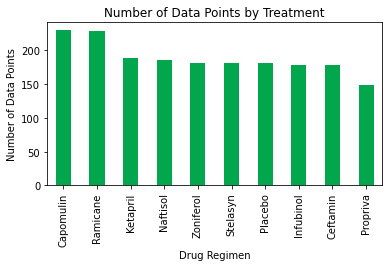

In [27]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 

# Mice count per treatment:
mice_per_treatment = grouped_regimen['Mouse ID'].count().sort_values(ascending=False)
# plotting:
mpt_plot = mice_per_treatment.plot(kind='bar', x='Treatment', 
                                   y=mice_per_treatment, color='#01A64D', figsize=(6,3), 
                                   xlim=(.55, len(mice_per_treatment)-.55), width=.45, 
                                   title='Number of Data Points by Treatment')
mpt_plot.set_ylabel('Number of Data Points')

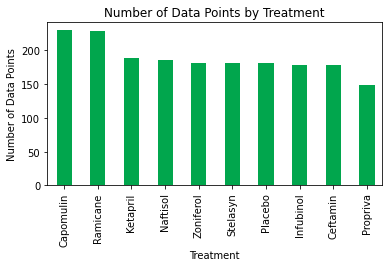

In [108]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
# defining x axis and plotting:
x_axis = mice_per_treatment.index
plt.figure(figsize=(6,3))
plt.bar(x_axis, mice_per_treatment, color='#01A64D', width=0.45)

plt.title('Number of Data Points by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=90)
plt.xlim(-.5, len(mice_per_treatment)-.55)
plt.show()

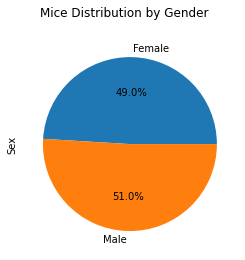

In [109]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
# grouping by mice gender
grouped_gender = cleaned_data.groupby('Sex')
mice_gender = grouped_gender['Sex'].count()
mgd_plot = mice_gender.plot(kind='pie', y='Sex', title='Mice Distribution by Gender', subplots=True, autopct='%1.1f%%')

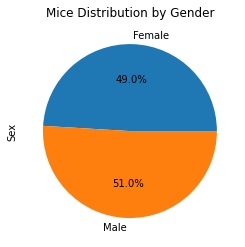

In [110]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
# defining the gender count:
gender_count = grouped_gender['Sex'].count().tolist()
gender_label = ['Female', 'Male']
plt.pie(gender_count, labels=gender_label, autopct='%1.1f%%')
plt.title('Mice Distribution by Gender')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculating the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# getting the last timepoint for each mouse:
grouped_miceID = cleaned_data[['Mouse ID', 'Timepoint']].groupby('Mouse ID').max()

# Merging this group df with the original dataframe to get the tumor volume at the last timepoint
ssc_final_vol = pd.merge(grouped_miceID, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')
ssc_final_vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [40]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)

#x-values:
treatment_select = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Creating empty list to fill with tumor vol data (for plotting), and quartiles and outliers.
tumor_vol = []
lowerq = []
upperq = []
iqr = []
outliers = []

# Calculating the IQR and quantitatively determine if there are any potential outliers. 
    # Locating the rows which contain mice on each drug and get the tumor volumes
    
for treatment in treatment_select:
 
    last_vol = ssc_final_vol.loc[ssc_final_vol['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # adding subsets and determining outliers using upper and lower bounds
    
    tumor_vol.append(last_vol.tolist())
    quartiles = last_vol.quantile([0.25, 0.5, 0.75])
    
    lowerq.append(quartiles.get(0.25))
    upperq.append(quartiles.get(0.75))
    
    iqr_result = quartiles.get(0.75) - quartiles.get(0.25)
    iqr.append(iqr_result)
    lower_bound = (quartiles.get(0.25)) - (1.5 * iqr_result)
    upper_bound = (quartiles.get(0.75)) + (1.5 * iqr_result)
    
    outliers_result = last_vol.loc[(last_vol < lower_bound) | (last_vol > upper_bound)]
    outliers.append(outliers_result.tolist())

treatment_quartiles_outliers = pd.DataFrame({'Drug Regimen': treatment_select,
                                             'Lower Q': lowerq,
                                             'Upper Q': upperq,
                                             'IQR': iqr, 
                                            'Outliers': outliers})
treatment_quartiles_outliers

,Drug Regimen,Lower Q,Upper Q,IQR,Outliers
0,Capomulin,32.377357,40.159220,7.781863,[]
1,Ramicane,31.560470,40.659006,9.098537,[]
2,Infubinol,54.048608,65.525743,11.477135,[36.321345799999996]
3,Ceftamin,48.722078,64.299830,15.577752,[]


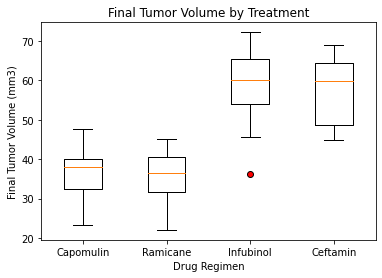

In [39]:
# Generating a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = {'markerfacecolor':'r', 'marker':'o'}
plt.boxplot(tumor_vol, flierprops=flierprops, labels=treatment_select)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volume by Treatment')
plt.show()

## Line and Scatter Plots

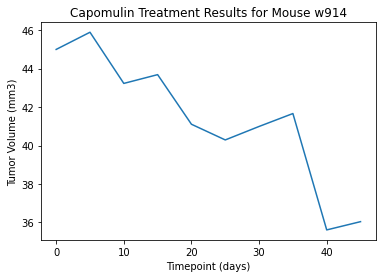

In [117]:
# Generating a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
capomulin_results = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin']
mouse = capomulin_results['Mouse ID'].sample().tolist()
mouse_results = capomulin_results.loc[capomulin_results['Mouse ID'] == mouse[0]]
plt.plot(mouse_results['Timepoint'], mouse_results['Tumor Volume (mm3)'])
plt.title(f'Capomulin Treatment Results for Mouse {mouse[0]}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

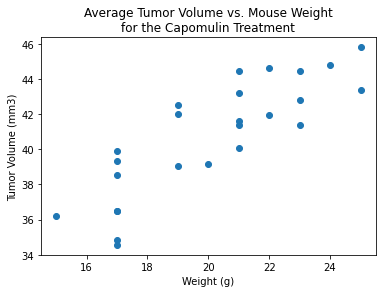

In [97]:
# Generating a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
capomulin_mean = capomulin_results.groupby(['Mouse ID']).mean()
mouse_weight_mean = capomulin_mean['Weight (g)']
mouse_tumor_mean = capomulin_mean['Tumor Volume (mm3)']

plt.scatter(mouse_weight_mean, mouse_tumor_mean)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight\nfor the Capomulin Treatment')
plt.show()

## Correlation and Regression

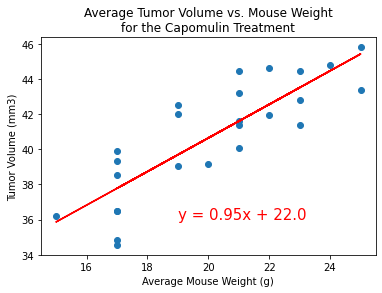

The correlation coefficient value r is 0.8419363424694718


In [118]:
# Calculating the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight_mean, mouse_tumor_mean)
# calculating the fit
regress_values = mouse_weight_mean * slope + intercept
# text holding the line equation:
equation = f'y = {round(slope, 2)}x + {round(intercept)}' 
# plotting:
plt.scatter(mouse_weight_mean, mouse_tumor_mean)
plt.annotate(equation, (19,36), fontsize=15, color='red')
plt.plot(mouse_weight_mean, regress_values, "r-")
plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Average Tumor Volume vs. Mouse Weight\nfor the Capomulin Treatment')
plt.show()
print(f'The correlation coefficient value r is {rvalue}')